In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Transformada de Fourier 1D

1. Use scipy.fftpack para calcular la transformada de Fourier de la siguiente señal
1. Muestre el espectro de magnitud y el espectro de fase.
1. Determine los frecuencias más relevantes estudiando el espectro de magnitud
1. Extraiga las fases asociadas a partir del espectro de fase
1. Reconstruya la señal "limpia" usando:
$$
y = \sum_{k=1}^K A_k \cos(2\pi t f_k + \phi_k) 
$$

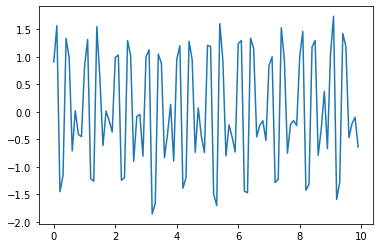

In [2]:
import pickle
time, data, Fs = pickle.load(open("data.pkl", "rb"))
plt.plot(time, data);

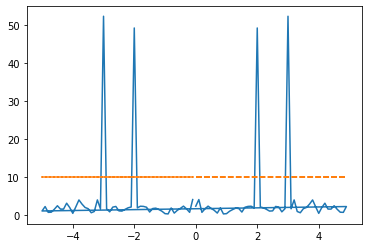

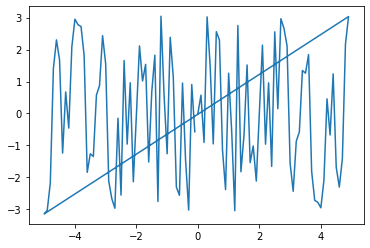

In [3]:
from scipy import fftpack

Data = fftpack.fft(data)
freq = fftpack.fftfreq(n=len(data), d=1/Fs)
plt.figure()
Data_amp = np.abs(Data)
plt.plot(freq, Data_amp)
plt.plot(freq, [10]*len(freq), linestyle='--')
plt.figure()
Data_angle = np.angle(Data)
plt.plot(freq, Data_angle)

In [4]:
mask = Data_amp > 10
frecuencias = freq[mask]
# Podemos ignorar las frecuencias negativas
print(frecuencias)
amplitudes = Data_amp[mask]
print(amplitudes[:2])
angulos = Data_angle[mask]
print(angulos[:2])

[ 2.  3. -3. -2.]
[49.20435171 52.29237757]
[ 0.04501855 -1.56002324]


Reconstruir con los componentes más importantes

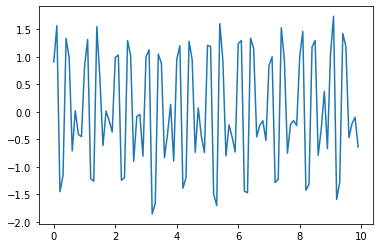

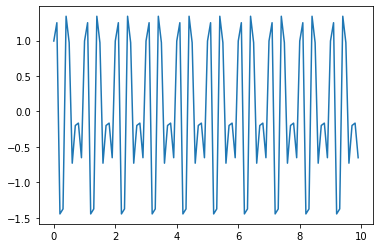

In [5]:
plt.figure()
plt.plot(time, data);

signal = np.cos(2.0*np.pi*time*frecuencias[0] + angulos[0])*amplitudes[0]*2/len(time) 
signal += np.cos(2.0*np.pi*time*frecuencias[1] + angulos[1])*amplitudes[1]*2/len(time)
plt.figure()
plt.plot(time, signal);

Reconstruir con todos los componentes

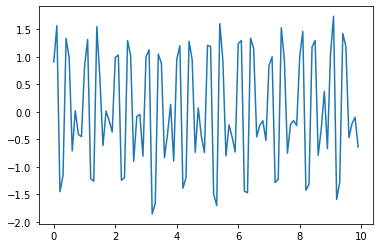

In [6]:
signal = np.cos(2.0*np.pi*time*freq[0] + Data_angle[0])*Data_amp[0]/len(time) 
for k in range(1, len(Data_amp)):
    signal += np.cos(2.0*np.pi*time*freq[k] + Data_angle[k])*Data_amp[k]/len(time) 
plt.plot(time, signal);

# Match filter

Un match filter es un filtro convolucional cuyo objetivo es detectar la presencia de una señal modelo o template dentro de otra señal

En este experimento usaremos imágenes en escala de grises

- La imagen denominada `template` corresponde al modelo
- La imagen denominada `data` corresponde a la imagen de prueba, es decir la señal donde queremos detectar la presencia o ausencia de nuestro modelo

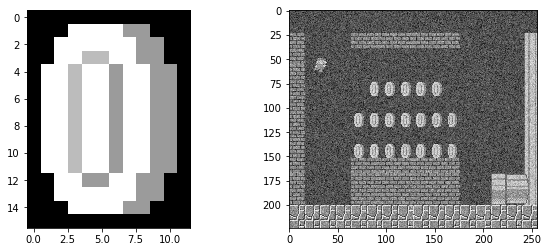

In [7]:
def color2bw(img):
    return np.dot(img, [0.299, 0.549, 0.112])

template = color2bw(plt.imread("template.png"))
data = color2bw(plt.imread("mario1.png"))
s_noise = 0.1
data += s_noise*np.random.randn(*data.shape) # Contaminación con ruido blanco

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(template, cmap=plt.cm.Greys_r);
ax[1].imshow(data, cmap=plt.cm.Greys_r);

Utilice la función de scipy [`correlate2d`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.correlate2d.html) para implementar el match filter

1. Obtenga versiones cetradas de `data` y `template` restandoles la media
1. Obtenga la correlación cruzada entre las señales usando correlate2d
1. Construya una máscara binaria en base a la correlación cruzada: `result > umbral` calibre el umbral de binarización tal que la máscara revele sólo la posición del template en la imagen
1. Muestre la imagen original y la máscara
1. (Opcional) Encuentre el valor máximo de `s_noise`  con el cual es posible detectar el template



In [8]:
datac = data - np.mean(data)
templatec = template - np.mean(template)

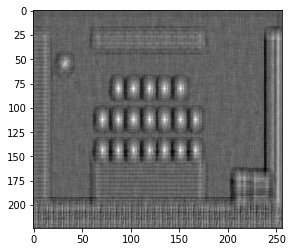

In [9]:
from scipy.signal import correlate2d
corr = correlate2d(datac, templatec, mode='same')
plt.imshow(corr, cmap=plt.cm.Greys_r)

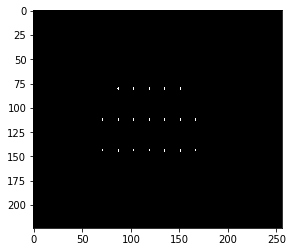

In [10]:
plt.imshow(corr > 10, cmap=plt.cm.Greys_r)